# EDA on Housing Prices per County

In this section, let's take a look at the housing price dataset from https://www.nar.realtor/research-and-statistics/housing-statistics/county-median-home-prices-and-monthly-mortgage-payment, which records the medium housing prices per county in the U.S. as of Q2 2021.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
import re

sns.set()
%matplotlib inline

In [22]:
df_home_price = pd.read_csv("../datasets/2021_median_home_prices_raw.csv", sep='\t', encoding = "utf-16")
df_home_price = df_home_price.dropna(how = "all")
df_home_price.head()

,Full County Number,Price-RangeQ22021,2nd Sentence,CBSA,Geography,growth,growth Q12021,growth Q22021,Metropolitan Area,Mortgage payment-verbiage,...,Q22017,Q3 2016,Q3 2018,Q3 2018 Price,Q3 2020 Price,Q3 Price,Q4 2016,Q4 2020 Price,Q4 Price,Q42019 Price
0,1001,"$150,000-$350,000",", housing is still more affordable since the m...",33860.0,"Autauga County, Alabama",rose,rose,rose,"Montgomery, AL MSA",lower,...,142.64,$145,144.06,"$142,792","$160,201","$146,691",143.05,"$161,743","$144,280","$153,716"
1,1003,"$150,000-$350,000",", housing is still more affordable since the m...",99001.0,"Baldwin County, Alabama",rose,rose,rose,AL NONMETROPOLITAN AREA,lower,...,182.60,$183,194.97,"$210,870","$231,103","$185,212",182.31,"$234,357","$184,655","$209,494"
2,1005,"Less than $150,000",", housing is still more affordable since the m...",99001.0,"Barbour County, Alabama",dropped,dropped,rose,AL NONMETROPOLITAN AREA,lower,...,182.60,$183,194.97,"$94,248","$93,954","$97,480",182.31,"$95,277","$97,187","$100,423"
3,1007,"Less than $150,000",", housing is still more affordable since the m...",13820.0,"Bibb County, Alabama",dropped,dropped,rose,"Birmingham-Hoover, AL MSA",lower,...,184.94,$180,197.34,"$112,903","$97,170","$114,263",179.86,"$98,445","$114,333","$101,799"
4,1009,"Less than $150,000",", housing is still more affordable since the m...",13820.0,"Blount County, Alabama",rose,rose,rose,"Birmingham-Hoover, AL MSA",lower,...,184.94,$180,197.34,"$130,775","$133,818","$133,288",179.86,"$135,574","$133,370","$131,548"


## Top 20 Counties with Highest Median Housing Price in 2021 Q2
* bar plot
* x-axis = Housing Price
* y-axis = County

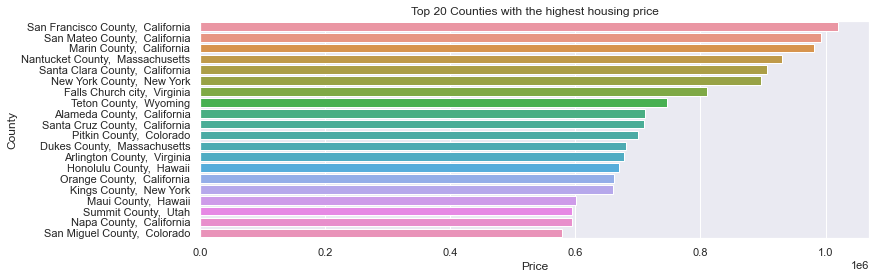

In [25]:
# top 20 county with most price in 2021 Q2
plot_data = df_home_price[["Geography", "Q2 Price"]]\
            .sort_values(by = "Q2 Price", ascending = False)\
            .head(20)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "Geography", x = "Q2 Price", orient = 'h').set(
    xlabel = "Price",
    ylabel = "County",
    title = "Top 20 Counties with the highest housing price"
)
plt.show()

We can see many of them are well-known counties, e.g. Bay area! How come these counties have such a high price? Maybe joining this dataset with others would give us more insight! Let's do that later. For now, let's dig more into this dataset.

## Top 20 Counties with Lowest Median Housing Price in 2021 Q2
* bar plot
* x-axis = Housing Price
* y-axis = County

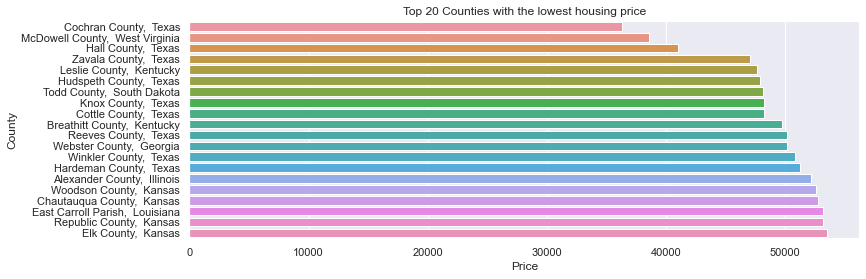

In [27]:
# top 20 county with lowest price in 2021 Q2
plot_data = df_home_price[["Geography", "Q2 Price"]]\
            .sort_values(by = "Q2 Price", ascending = True)\
            .head(20)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "Geography", x = "Q2 Price", orient = 'h').set(
    xlabel = "Price",
    ylabel = "County",
    title = "Top 20 Counties with the lowest housing price"
)
plt.show()

It's astonishing to see the difference between the lowest prices with the highest prices!

## Top 20 Counties with Highest Growth from 2019 - 2021
* bar plot
* x-axis = Housing Price Increase Rate
* y-axis = County

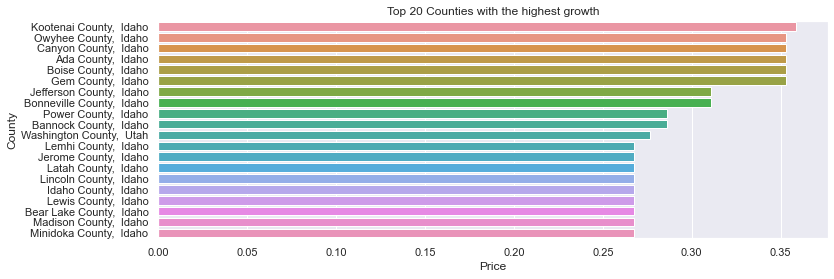

In [31]:
plot_data = df_home_price[["Geography", "Growth Q2 2021 (compared to Q4 2019)"]]\
            .sort_values(by = "Growth Q2 2021 (compared to Q4 2019)", ascending = False)\
            .head(20)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "Geography", x = "Growth Q2 2021 (compared to Q4 2019)", orient = 'h').set(
    xlabel = "Price",
    ylabel = "County",
    title = "Top 20 Counties with the highest growth"
)
plt.show()

Interestingly, almost all top counties are from Idaho rather than a place with a high housing price (e.g. Bay area).